In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

In [2]:
data_train=pd.read_csv("Downloads/train.csv")

EDA

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data_new=data_train.drop(['Ticket','Cabin','Fare','Name','Embarked'],axis=1)

In [7]:
data_new.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


In [8]:
data_new['Sex'].astype('category')

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: category
Categories (2, object): ['female', 'male']

<Axes: xlabel='Sex', ylabel='count'>

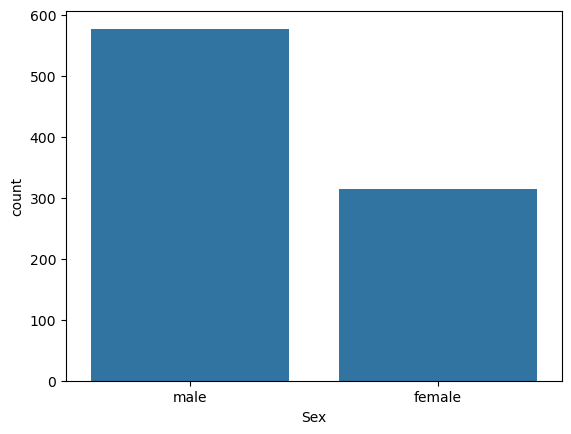

In [9]:
sns.countplot(data=data_new,x='Sex')

<Axes: xlabel='Pclass', ylabel='count'>

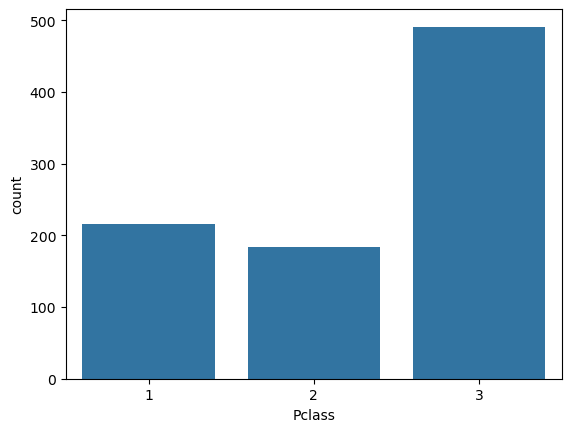

In [10]:
sns.countplot(data=data_new,x='Pclass')

<Axes: xlabel='Survived', ylabel='count'>

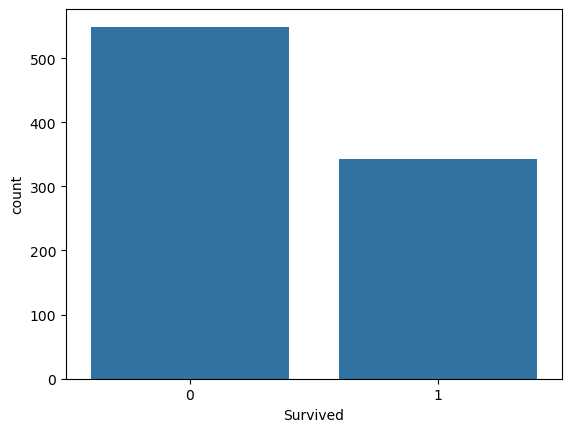

In [11]:
sns.countplot(data=data_new,x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

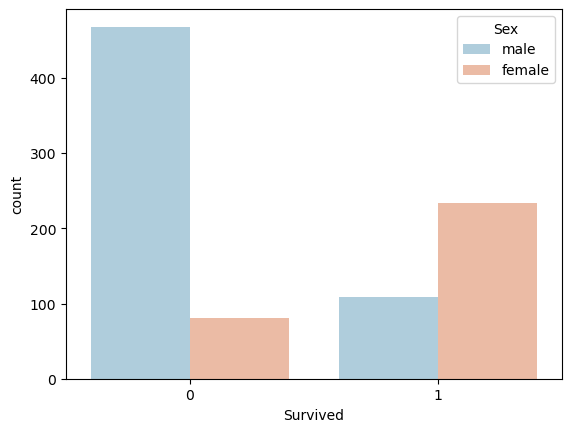

In [12]:
sns.countplot(data=data_new,x='Survived',hue='Sex',palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

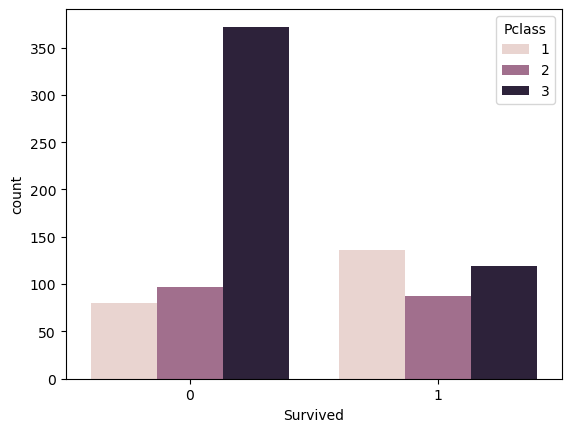

In [14]:
sns.countplot(data=data_new,x='Survived',hue='Pclass')

In [13]:
data_new['Sex'] = data_new['Sex'].map({'male': 0, 'female': 1})

data_new.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22.0,1,0
1,2,1,1,1,38.0,1,0
2,3,1,3,1,26.0,0,0
3,4,1,1,1,35.0,1,0
4,5,0,3,0,35.0,0,0


In [14]:
Xtrain=data_new.iloc[:,2:]
ytrain=data_new.iloc[:,1]

In [15]:
Xtrain.shape

(891, 5)

In [16]:
Xtrain = Xtrain.dropna()
ytrain = ytrain[Xtrain.index]

In [17]:
feature_means = Xtrain.mean()
feature_stds  = Xtrain.std(ddof=0)

# scale Xtrain
Xtrain_scaled = (Xtrain - feature_means) / feature_stds

In [18]:
def sigmoid(X,w,b):
    
    z=np.dot(X,w)+b
    z = np.clip(z, -500, 500)
    g=1/(1+np.exp(-z))
    return g

In [19]:
def cost(X,y,w,b):
    m,n=X.shape
    cost=0
    eps = 1e-15
    for i in range(m):
        f=sigmoid(X[i],w,b)
        f = np.clip(f, eps, 1 - eps) 
        cost+=((y[i]*np.log(f))+((1-y[i])*np.log(1-f)))
    cost=(-cost/m)
    return cost
        
    

In [20]:
def grad(X,y,w,b):
    m,n=Xtrain.shape
   
    dj_dw=np.zeros(X.shape[1])
    dj_db=0.0
    for i in range(m):
        f=sigmoid(X[i],w,b)
        err=f-y[i]
        for j in range(n):
            dj_dw[j]+=err*X[i,j]
        dj_db+=err
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db
        
    

In [21]:
def para(X,y,w,b,epochs,alpha):
    J_hist=[]
    m,n=Xtrain.shape
    
    wn=w
    bn=b
    
    for i in range(epochs):
        dj_dw,dj_db=grad(X,y,wn,bn)
        wn=(wn-alpha*(dj_dw))
        bn=(bn-alpha*(dj_db))
        j=cost(X,y,wn,bn)
        J_hist.append(j)

        if i% math.ceil(epochs/10)==0:
            print(f"Iteration:{i}/{epochs}",f"Cost:{j}",f"w:{wn}",f"b:{bn}")
    return wn,bn,J_hist
            
    
    

In [29]:
print(np.unique(ytrain))                   # what values are in y?
print(np.any(np.isnan(Xtrain)))            # True if X contains NaNs
print(np.max(np.abs(Xtrain)))  

[0 1]
False
80.0


In [31]:
X = Xtrain_scaled.to_numpy()
y = ytrain.to_numpy()

alpha = 0.05
epochs = 5000     # fixed number of iterations


w = np.zeros(X.shape[1])
b = 0.0
w_f, b_f, hist = para(X, y, w, b, epochs, alpha)
   



Iteration:0/5000 Cost:0.6875058807399872 w:[-0.00883155  0.01323128 -0.00189622 -0.00042625  0.00229147] b:-0.004691876750700281
Iteration:500/5000 Cost:0.44736795785618716 w:[-0.96432745  1.19740847 -0.50932587 -0.26557671 -0.02504294] b:-0.48406592913037033
Iteration:1000/5000 Cost:0.4458816623805006 w:[-1.07316002  1.25667108 -0.61553486 -0.32138253 -0.03289559] b:-0.5131835910911174
Iteration:1500/5000 Cost:0.4458173348563073 w:[-1.09584816  1.26718329 -0.63857956 -0.33464162 -0.03216408] b:-0.518616987388272
Iteration:2000/5000 Cost:0.44581410201492844 w:[-1.10088951  1.26945552 -0.64374506 -0.33779326 -0.03180238] b:-0.5198206230524751
Iteration:2500/5000 Cost:0.44581393475099346 w:[-1.10203005  1.26996641 -0.64491772 -0.33852827 -0.0317028 ] b:-0.5200938189440288
Iteration:3000/5000 Cost:0.44581392604173364 w:[-1.10228963  1.27008243 -0.64518503 -0.33869775 -0.03167848] b:-0.5201560920332738
Iteration:3500/5000 Cost:0.4458139255876068 w:[-1.10234884  1.27010886 -0.64524605 -0.33

In [26]:
# Check how many 0's and 1's are in the training labels
unique_vals, counts = np.unique(ytrain, return_counts=True)
for u, c in zip(unique_vals, counts):
    print(f"Class {u}: {c} samples")


Class 0: 424 samples
Class 1: 290 samples


In [32]:
for i in range(400, Xtrain.shape[0]):
    prob = sigmoid(X[i], w_f, b_f)   # use scaled numpy array
    pred = 1 if prob >= 0.5 else 0
    target = y[i]
    print(f"probability: {prob:.2f}, predicted: {pred}, target: {target}")


probability: 0.51, predicted: 1, target: 0
probability: 0.97, predicted: 1, target: 1
probability: 0.62, predicted: 1, target: 0
probability: 0.81, predicted: 1, target: 1
probability: 0.10, predicted: 0, target: 0
probability: 0.11, predicted: 0, target: 1
probability: 0.09, predicted: 0, target: 1
probability: 0.52, predicted: 1, target: 1
probability: 0.82, predicted: 1, target: 1
probability: 0.12, predicted: 0, target: 0
probability: 0.40, predicted: 0, target: 0
probability: 0.81, predicted: 1, target: 1
probability: 0.74, predicted: 1, target: 1
probability: 0.08, predicted: 0, target: 0
probability: 0.95, predicted: 1, target: 1
probability: 0.13, predicted: 0, target: 0
probability: 0.91, predicted: 1, target: 1
probability: 0.06, predicted: 0, target: 0
probability: 0.68, predicted: 1, target: 1
probability: 0.06, predicted: 0, target: 0
probability: 0.19, predicted: 0, target: 0
probability: 0.92, predicted: 1, target: 1
probability: 0.11, predicted: 0, target: 0
probability

In [33]:
probs = sigmoid(X, w_f, b_f)                   
preds = (probs >= 0.5).astype(int)   

accuracy = np.mean(preds == y)                 

print(f"Training Accuracy: {accuracy*100:.2f}%")

Training Accuracy: 80.81%
